In [312]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
from keras.utils import np_utils

In [313]:
cd G:\My Drive\Colab Notebooks\DAV Assessment\Cefas_smartbuoy

G:\My Drive\Colab Notebooks\DAV Assessment\Cefas_smartbuoy


In [314]:
df = pd.read_csv('clean_ext_data.csv', parse_dates = ['dateTime'])
df = df.set_index('dateTime')
df = df.drop('kd', axis = 1)
df = df.dropna()

phase_0 = df.loc[df['phase'] == 0, :].copy()
X = phase_0.drop(['fluors', 'phase'], axis = 1).copy()
y = phase_0['fluors'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

# standardize the data
scaler = StandardScaler()
# train the scaler on the training data
X_train = scaler.fit_transform(X_train)
# apply the scaler to the test data sets
X_test = scaler.transform(X_test)
X = scaler.transform(X)
len(X_train)

21484

In [315]:
model = Sequential()
model.add(Dense(units = 200, activation = "relu", input_shape = (4, )))
model.add(Dropout(0.2)) # my addition
model.add(Dense(units = 450, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(units = 200, activation = "relu"))
model.add(Dropout(0.2)) # my addition
model.add(Dense(units = 100, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(units = 800, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation = "relu"))
model.summary()
model.compile(loss = 'mean_squared_error', optimizer = "adam") # metrics = ['mean_squared_error'])

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_165 (Dense)           (None, 200)               1000      
                                                                 
 dropout_110 (Dropout)       (None, 200)               0         
                                                                 
 dense_166 (Dense)           (None, 450)               90450     
                                                                 
 dropout_111 (Dropout)       (None, 450)               0         
                                                                 
 dense_167 (Dense)           (None, 200)               90200     
                                                                 
 dropout_112 (Dropout)       (None, 200)               0         
                                                                 
 dense_168 (Dense)           (None, 100)             

In [316]:
no_epochs = 200
history = model.fit(X_train, y_train, batch_size = 200, epochs = no_epochs, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/200
108/108 [==============================] - 5s 29ms/step - loss: 2.9745 - val_loss: 2.6043
Epoch 2/200
108/108 [==============================] - 3s 27ms/step - loss: 2.6084 - val_loss: 2.4080
Epoch 3/200
108/108 [==============================] - 3s 26ms/step - loss: 2.4665 - val_loss: 2.1965
Epoch 4/200
108/108 [==============================] - 3s 27ms/step - loss: 2.2877 - val_loss: 1.9646
Epoch 5/200
108/108 [==============================] - 3s 26ms/step - loss: 2.0083 - val_loss: 1.8211
Epoch 6/200
108/108 [==============================] - 3s 26ms/step - loss: 1.9624 - val_loss: 1.6945
Epoch 7/200
108/108 [==============================] - 3s 27ms/step - loss: 1.7832 - val_loss: 1.5792
Epoch 8/200
108/108 [==============================] - 3s 26ms/step - loss: 1.7307 - val_loss: 1.5771
Epoch 9/200
108/108 [==============================] - 3s 26ms/step - loss: 1.7365 - val_loss: 1.5888
Epoch 10/200
108/108 [==============================] - 3s 27ms/step - loss: 1.668

C:\Users\Reuben\AppData\Local\Temp\ipykernel_11696\4169881156.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


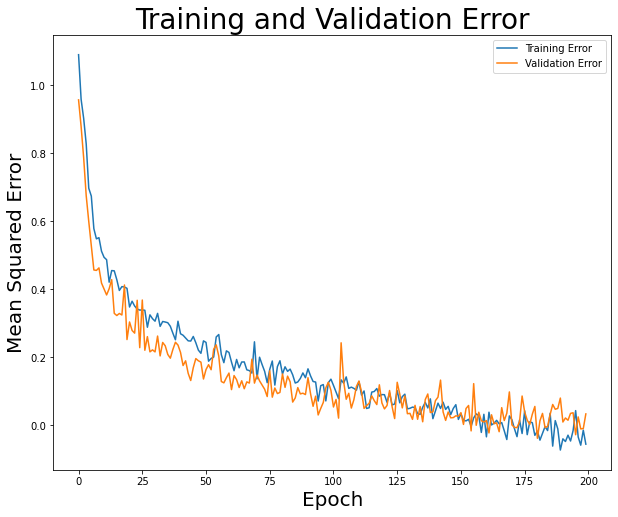

In [317]:
epochs_range = range(no_epochs)
train_err = history.history['loss']
validation_err = history.history['val_loss']
#train_loss = history.history['loss']
#validation_loss = history.history['val_loss']

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(epochs_range, np.log(train_err), label = 'Training Error')
ax.plot(epochs_range, np.log(validation_err), label = 'Validation Error')
ax.legend(loc = 'upper right')
ax.set_xlabel('Epoch', fontsize = 20)
#ax.set_xticks(epochs_range)
ax.set_ylabel('Mean Squared Error', fontsize = 20)
ax.set_title('Training and Validation Error', fontsize = 28)
fig.show()

In [318]:
pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train)))
pred_test = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_test)))

672/672 [==============================] - 2s 3ms/step
0.8829364873552535
672/672 [==============================] - 3s 4ms/step
1.0169190111946589


In [319]:
#model.save('b2e20_1.h5')

In [320]:
#model = keras.models.load_model('model.h5')
pred_train = model.predict(X_train)
print(f'{np.sqrt(mean_squared_error(y_train, pred_train)):.2f}')
pred_test = model.predict(X_test)
print(f'{np.sqrt(mean_squared_error(y_test, pred_test)):.2f}')
y_pred = model.predict(X)
print(f'{np.sqrt(mean_squared_error(y, y_pred)):.2f}')

672/672 [==============================] - 2s 3ms/step
0.88
672/672 [==============================] - 2s 3ms/step
1.02
1343/1343 [==============================] - 5s 4ms/step
0.95


C:\Users\Reuben\AppData\Local\Temp\ipykernel_11696\1006791677.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


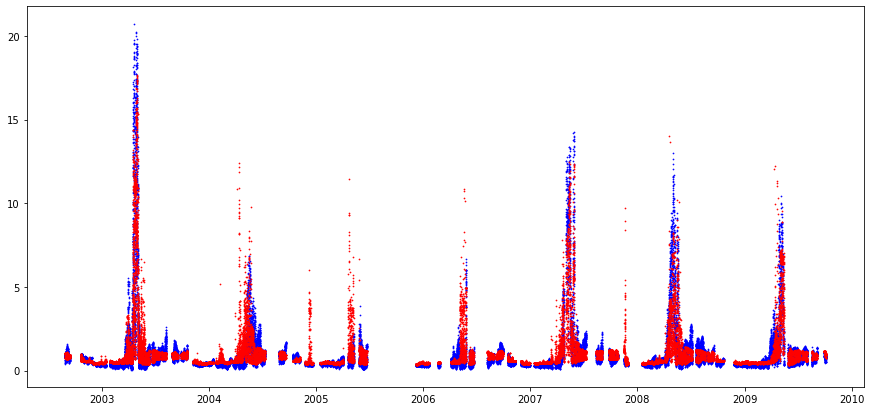

In [321]:
phase_0.loc[:, 'y_pred'] = y_pred
fig, ax = plt.subplots(figsize = (15, 7))
ax.scatter(phase_0.index, phase_0['fluors'], s = 0.5, color = 'blue')
ax.scatter(phase_0.index, phase_0['y_pred'], s = 0.5, color = 'red')
#fig.savefig('predictions.png')
fig.show()

#phase_0.drop(['sal', 'ftu', 'surf_temp', 'phase', 'direct_solar'], axis = 1).to_csv('phase_0_predictions.csv', index = 'false', sep = ',')

In [322]:
phase_1 = df.loc[df['phase'] > 0, :].copy()
X_1 = phase_1.drop(['fluors', 'phase'], axis = 1).copy()
y_1 = phase_1.loc[:, 'fluors'].copy()
scaler = StandardScaler()
X_1 = scaler.fit_transform(X_1)
y_1_pred = model.predict(X_1)
print(f'{np.sqrt(mean_squared_error(y_1, y_1_pred)):.2f}')
#phase_1.drop(['sal', 'ftu', 'surf_temp', 'phase', 'direct_solar'], axis = 1).to_csv('phase_1_predictions.csv', index = 'false', sep = ',')

1904/1904 [==============================] - 7s 4ms/step
1.46


C:\Users\Reuben\AppData\Local\Temp\ipykernel_11696\2978685884.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


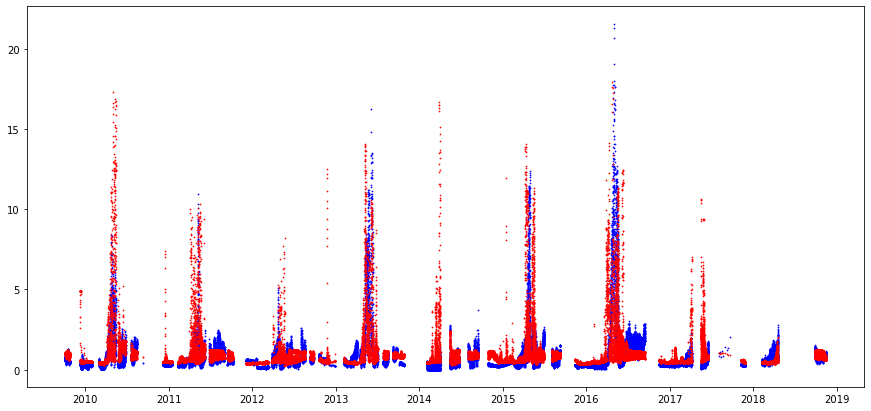

In [323]:
phase_1['y_1_pred'] = y_1_pred
fig, ax = plt.subplots(figsize = (15, 7))
ax.scatter(phase_1.index, phase_1['fluors'], s = 0.5, color = 'blue')
ax.scatter(phase_1.index, phase_1['y_1_pred'], s = 0.5, color = 'red')
#fig.savefig('future_predictions.png')
fig.show()